<a href="https://colab.research.google.com/github/geovanemelo/Portfolios-Data-Science/blob/main/Analisando_os_Dados_do_Airbnb_(Buenos_Aires).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Science na Prática**
*by [Geovane Melo](https://www.linkedin.com/in/geovane-melo-da-silva-105040147/)*

---



# Análise dos Dados do Airbnb - Buenos Aires

O [Airbnb](https://www.airbnb.com.br/), fundado em 2008 em São Fransisco, na California vem inovando na forma de se hospedar de turistas do mundo inteiro, e a empresa se tornou hoje em dia referência no ramo de hospedagem mesmo **sem ter nenhum hotel!**

Anfitriões oferecem seus imóveis de maneira prática na plataforma e se conectam com turistas que preferem ter o seu *cantinho* do que a um tradicional hotel no seu momento de relaxamento.

Com seu jeito peculiar e inovador, no final de 2018, a empresa americana já havia hospedado **mais de 300 milhões** de pessoas em todos os cantos do mundo, e vem sendo cada vez mais procurada, por hóspedes e anfitriões.

A empresa tem como iniciativa, disponibilizar alguns dados de hospedagem das maiores cidades do mundo. Atráves do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possivel ter acesso á uma quantidade de dados incriveis, onde se pode baixar e desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados usados nesse estudos foram retirado do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

O inside AirBnB é um independente e não-comercial conjunto de ferramentas e dados. 
O portal permite que você explore a forma que o AirBnB trabalha e inova em todo planeta.

O portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) não é associado ao AirBnB ou qualquer outro concorrente. Para mais informações sobre o portal clique [aqui](http://insideairbnb.com/behind.html).

Com intuito de uma análise explorátoria inicial, apenas o seguinte arquivo será utilizado:

* `listings.csv` - *Summary information and metrics for listings in Buenos Aires (good for visualisations).*

In [ ]:
# importando os pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importando o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2020-12-24/visualisations/listings.csv")

# Análise dos Dados

Etapa de entendimento inicial, com intuito de compreender a forma que os dados estão estruturados.

**Dicionário das variáveis**

*entenda o que representa cada coluna*

* `id` - Numero gerado automaticamente para identificação do imóvel
* `name` - Título do anuncio feito
* `host_id` - id do anfitrião da propriedade
* `host_name` - Primeiro nome do anfitrião
* `neighbourhood_group` - Está coluna não contém valores válidos
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel (*em real brasileiro)
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

*obs: foi feita a conversão de moedas de peso argentino para real brasileiro. em 01/01/2012 a cotação é : 
1,00 Real brasileiro é igual a 15,99 Peso argentino*

Começaremos verificando a "cara" do nosso *dataset*, analisando as 5 primeiras entradas.


In [ ]:
#conversão na coluna price de peso para real

df.price = round(df.price / 15.99,2)

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,312.57,2,26,2019-11-28,0.25,1,0
1,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,140.65,1,20,2017-12-11,0.15,1,365
2,13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,156.29,1,1,2018-12-18,0.04,7,365
3,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,156.29,1,0,NaN,NaN,7,365
4,13097,Standard Room at Palermo Viejo B&B pvt bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,156.29,1,10,2019-11-27,0.44,7,0


### **Q1. Quantos atributos e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Nessa parte, iremos identficar a quantidade de entradas e variáveis do *dataset* e apontar seus tipos em cada coluna.

Lembrando que: esse conjuntos de dados é a versão 'resumida'. Na mesma página temos a versão completa com 35847 e 106 variáveis (`listings.csv.gz`)



In [ ]:
# identificando o volume de dados do DataFrame
print("Entradas:\t {}".format (df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificando os tipos de variáveis do dataset

display(df.dtypes)

Entradas:	 20636
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


Nosso *dataset* contém **20636 entradas** (ou linhas) e **16 variáveis** (ou colunas)

Os três tipos de variaveis são: 

*   *int64* (números inteiros)
*   *float64* (números decimais)
*   *object* (texto)





### **Q2. Qual a porcetagem de valores ausentes no dataset?**

Os valores ausentes interferem diretamente na qualidade do *dateset*. Por isso, no início devemos nos questionar se os valores nulos são significativos em comparação as entradas totais.








In [ ]:
# Ordenando em ordem decrescente as variáveis por seus valores ausentes

round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False),4)

neighbourhood_group               1.0000
reviews_per_month                 0.3007
last_review                       0.3007
name                              0.0002
host_name                         0.0002
availability_365                  0.0000
calculated_host_listings_count    0.0000
number_of_reviews                 0.0000
minimum_nights                    0.0000
price                             0.0000
room_type                         0.0000
longitude                         0.0000
latitude                          0.0000
neighbourhood                     0.0000
host_id                           0.0000
id                                0.0000
dtype: float64


A partir da porcetagem de dados ausentes de cada váriavel é possível confirmar que:


*   A coluna `neighbourhood_group` possui 100% de valores faltantes
*   As variáveis `reviews_per_month` e `last_review` possuem 30% de valores nulos
*   As variáveis `name` e `host_name` possui pouquissimas linhas faltantes
*  As variáveis restantes das citadas acima estão 100% preenchidas


### **Q3. Qual o tipo de distribuição das variáveis?**

A fim de identificação da distribuição das variáveis, iremos plotar histogramas, nos quais serão possíveis analisar as distribuições e responder nossa questão


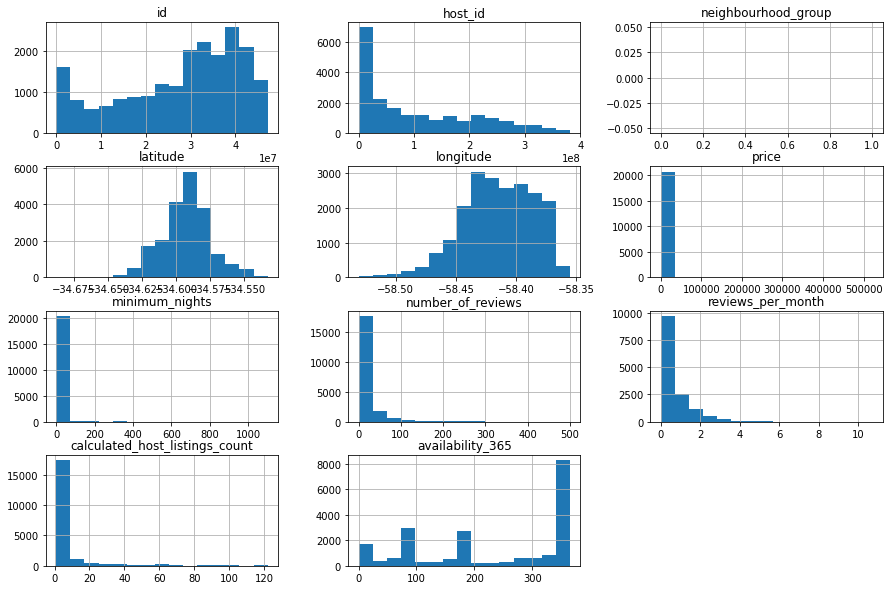

In [ ]:
# plotar o histograma das variávies numéricas

df.hist(bins=15,figsize=(15,10));


A partir da análise dos gráficos é possível confirmar que:

*   Em `availability_365` pode se dizer que grande parte dos alojamentos estão disponíveis o ano inteiro (365 dias)
*   Nos gráficos de `price`, `minimum_nights` e `calculated_host_listing_count` há fortes índicios de *outliers* presentes.(trabalharemos mais a fundo na próxima questão)
*   Os gráficos restantes dos citados acimas não apresentam informações relevantes ou notórias nesse tipo de representação.




### **Q4. Há outliers presentes?**

Após a plotagem dos histogramas, foi capaz de se verificar indícios de *outliers*. Por exemplo nas variáveis: `price`,`minimum_nights` e `calculated_host_listing_count`

Os valores por não seguirem uma distribuição, distorcem toda represetanção gráfica. Existem dois metódos que ajudam na detecção de *outlieres*, são eles:

  

*   Resumo estatísco por meio do método `describe()`
*   Plotar `boxplots` p/ a variável

In [ ]:
 #Vendo o resumo estatísco das variáveis numéricas
df[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count' ,'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,20636.000000,20636.000000,20636.000000,14431.000000,20636.000000,20636.000000
mean,301.499124,6.441316,16.460845,0.699708,7.522873,231.519626
std,3837.693565,19.423860,33.570021,0.833883,17.278160,130.819993
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,99.000000,2.000000,0.000000,0.140000,1.000000,90.000000
50%,156.290000,3.000000,3.000000,0.390000,2.000000,267.500000
75%,250.030000,5.000000,17.000000,0.955000,4.000000,364.000000
max,520929.270000,1100.000000,500.000000,10.710000,122.000000,365.000000


Observando o resumo acima, temos algumas informações insólitas, como:

*   A variável `price` possui 75% do valores abaixo de 250, porém seu valor máximo é de 520929.
*   A quantidade máxima de minimas de noites(`minimum_nights`) está acima de 365 dias no ano



#### Boxplot para minimum_nights

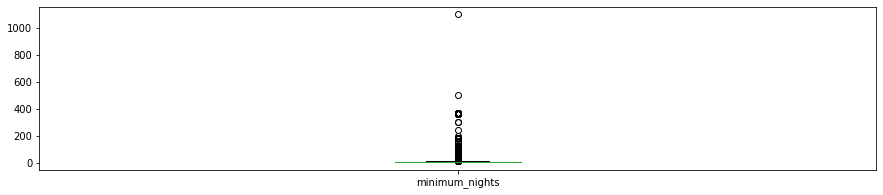

No boxplot, a linha verde representa a média.


minimum_nights: valores acima de 30
339 entradas
1.6428%


In [ ]:
#minimum_nights

df.minimum_nights.plot(kind='box',vert=True,figsize=(15,3))
plt.show()
print("No boxplot, a linha verde representa a média.\n\n")

# ver quantidades de valores acima de 30 dias para minimum_nights

print("minimum_nights: valores acima de 30")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights> 30]) / df.shape[0])*100))



*   As noites acima de 30 represetam apenas 1.6% do nosso *dataset*, por isso a opção mais indicada é a remoçao desses *outliers*.




#### Boxplot para price

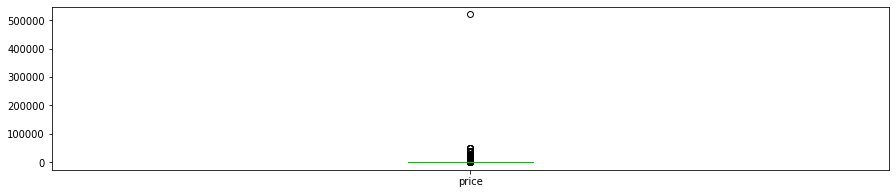

No boxplot, a linha verde representa a média.



price: valores acima de 1000
456 entradas
2.2097%


In [ ]:
# price
df.price.plot(kind='box', vert=True, figsize=(15,3),)
plt.show()
print("No boxplot, a linha verde representa a média.\n\n")

# ver quantidade de valores acima de 1000 para price

print("\nprice: valores acima de 1000")
print("{} entradas".format(len(df[df.price>1000])))
print("{:.4f}%".format((len(df[df.price>1000])/ df.shape[0])*100))

*   Os preços acima de 1000 represetam somente 2% do *dataset*, por isso a remoção desses *outliers* é a opção mais indicada.


#### Histogramas sem outliers

Agora que indentificamos os outliers nas colunas `price` e `minimum_nights` , vamos limpar o conjunto de dados e plotar os histogramas novamente.

*   Na coluna `price`, valores acima de 1000 terão toda sua entrada removida do *dataset*.
*   Tambem removeremos valores menores que 1 na coluna `price`
*   Na coluna  `minimum_nights`, valores acima de 30 terão toda sua entrada removida do *dataset*
*   A coluna `neighbourhood_group` será removida pois está vazia 
*   Esses processos serão feitos em um novo *dataset*, com o intuito de preservação do original





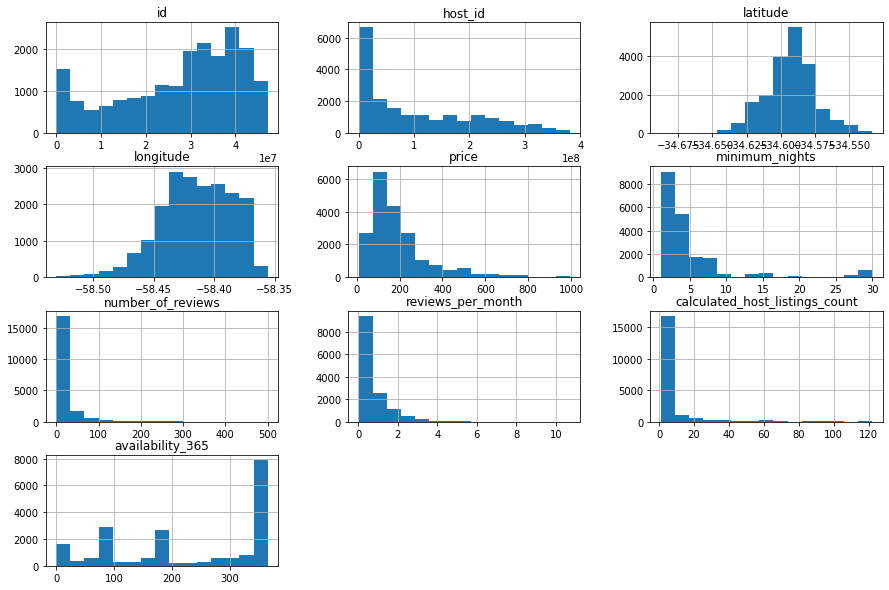

In [ ]:
# remover os outliers em um novo DataFrame
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)

df_clean.drop(df_clean[df_clean.price < 1].index, axis=0, inplace=True)

df_clean.drop(df_clean[df_clean.minimum_nights>30].index, axis=0, inplace=True)

# remover neighbourhood_group, pois está vazio
df_clean.drop('neighbourhood_group', axis=1,inplace=True)

#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

#### Resumo gráfico sem outliers

In [ ]:
df_clean[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count' ,'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19838.000000,19838.000000,19838.000000,14054.000000,19838.000000,19838.000000
mean,194.707482,4.675219,16.739540,0.704961,7.454380,230.335417
std,151.776772,6.191124,33.843219,0.836000,17.320337,130.687041
min,8.010000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,96.940000,2.000000,0.000000,0.140000,1.000000,90.000000
50%,151.090000,3.000000,4.000000,0.390000,2.000000,263.000000
75%,234.400000,5.000000,18.000000,0.970000,4.000000,364.000000
max,995.000000,30.000000,500.000000,10.710000,122.000000,365.000000


### **Q5. Qual a correlação existente entre as variáveis?**

Existe alguma semelhaça entre duas variaveis? Buscaremos agora, alguma correlação relevante.

Para esse processo, realizaremos as seguintes tarefas:


*   Criar uma matriz de correlação 
*   Gerar um heatmap a partir desssa matriz, usando a biblioteca *seaborn*


In [ ]:
# Criando uma matriz de correlação

corr = df_clean [['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.038491,-0.029361,-0.068753,0.130199,0.041011
minimum_nights,-0.038491,1.000000,-0.082567,-0.122470,0.122160,0.008823
number_of_reviews,-0.029361,-0.082567,1.000000,0.771585,-0.067608,-0.016154
reviews_per_month,-0.068753,-0.122470,0.771585,1.000000,-0.059042,-0.090941
calculated_host_listings_count,0.130199,0.122160,-0.067608,-0.059042,1.000000,0.032162
availability_365,0.041011,0.008823,-0.016154,-0.090941,0.032162,1.000000


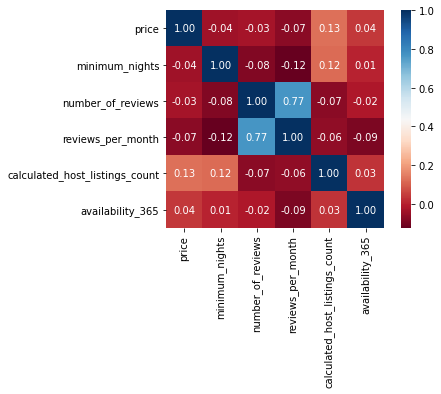

In [ ]:
#criando um heatmap

sns.heatmap(corr, cmap='RdBu', fmt='.2f',square=True,linecolor='white',annot=True);


*   O *heatmap* acima não apresenta nenhuma correlação relevante, apenas um pequeno um indicio de 0.77 entre as colunas `number_of_reviews` e `reviews_per_month`. O que se trata de uma informação intuitiva.

### **Q6. Qual o tipo de imóvel mais alugado?**

O AirBnB oferece opções de alojamentos, como por exemplo: apartamentos, casas, quartos ou até mesmos quartos compartilhados.

A coluna da variável `room_type` indica exatamente o tipo de locação anunciada, e é com ela que iremos trabalhar agora.

Para contar a quantidade de ocorrências de cada tipo de aluguel, usaremos o método `value_counts()` 




In [ ]:
# mostrando a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    15587
Private room        3681
Shared room          426
Hotel room           144
Name: room_type, dtype: int64

In [ ]:
# mostrando a porcetagem de cada tipo de imóvel disponivel
round(df_clean.room_type.value_counts() / df_clean.shape[0],4)

Entire home/apt    0.7857
Private room       0.1856
Shared room        0.0215
Hotel room         0.0073
Name: room_type, dtype: float64

#### Representação gráfica de tipos de móveis

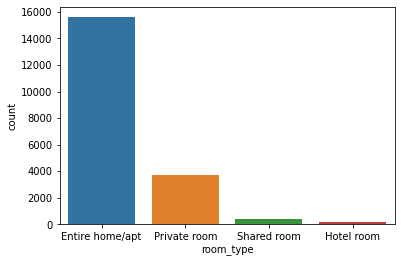

In [ ]:
sns.countplot(x='room_type',data=df_clean);

### **Q7. Qual a localidade mais cara de Buenos Aires?**

Para se verificar uma variável em função de uma outra, usamos o método `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) e seus preços (*prices*).

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:3]

neighbourhood
Puerto Madero    436.428157
Villa Real       318.012222
Villa Soldati    314.093333
Name: price, dtype: float64

Como podemos observar acima, os bairros de Puerto Madero, Villa Real e Villa Soldati, estão sendo apresentados como os mais caros, mas sera que isso representa a realidade?

Para responder essa duvida, iremos analisar a quantidade de imóveis em Puerto Madero, Villa Real e Villa Soldati.

In [ ]:
# ver quantidade de imóveis em Puerto Madero

print('Quantidade de imóveis em Puerto Madero: {}'.format((df_clean[df_clean.neighbourhood == "Puerto Madero"].shape[0])))

print('Quantidade de imóveis em Villa Real: {}'.format((df_clean[df_clean.neighbourhood == "Villa Real"].shape[0])))

print('Quantidade de imóveis em Villa Soldati: {}'.format((df_clean[df_clean.neighbourhood == "Villa Soldati"].shape[0])))


Quantidade de imóveis em Puerto Madero: 217
Quantidade de imóveis em Villa Real: 9
Quantidade de imóveis em Villa Soldati: 3


Através das respostas dadas acima, é possivel afirmar que:


*   Com seus 217 imóveis, com preço médio de R$436, Puerto Madero **pode ser considerado o bairo mais caro** de Buenos Aires.

<center><img alt="Puerto Madero - Buenos Aaires" width="50%" src="https://image.freepik.com/fotos-gratis/puerto-madero-buenos-aires_78361-3502.jpg"></center>

*   Villa Real e Villa Soldati contém juntas apenas 12 entradas, e por isso **não podem ser considerados** como bairros mais caros, por apresentarem poucas entradas no *dataset*



#### Plotagem atráves de latitude e longitude.

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`

Na imagem sera considerado o preço de cada alojamento no eixo Y.

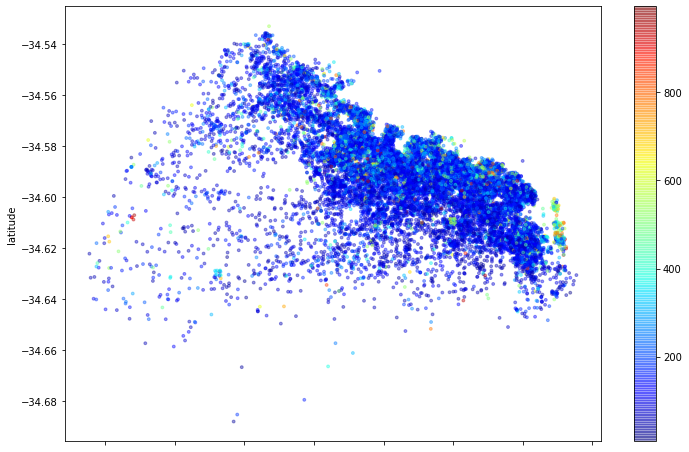

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### Q8. Informações de alojamentos em outros bairros populares.

Em Buenos Aires existem outros bairros muito procurado por turistas no ano inteiro, segundo o portal [aguiarbuenosaires.com](https://aguiarbuenosaires.com) alguns dos bairros principais são:

*   La boca
*   Retiro
*   Recoleta
*   Palermo
*   Puerto Madero


*para materia completa sobre o bairros da capital argentina clique [aqui](https://aguiarbuenosaires.com/bairros-de-buenos-aires/)*


#### La Boca
O mais antigo bairro da capital, muito procurado por turistas. Tem como pontos turisticos principais a *La Bombonera* e o *Caminito*

<center><img alt="La boca - Buenos Aaires" width="50%" src="https://image.freepik.com/fotos-gratis/caminito-alley-no-bairro-de-la-boca-buenos-aires-argentina_76000-2147.jpg"></center>

In [ ]:
#Construindo um dataset apenas com as informações mais relevantes e apenas com entradas do bairro de "Boca"
df_boca=df_clean[['room_type','price','minimum_nights','availability_365','neighbourhood']].query("neighbourhood=='Boca'").reset_index(drop=True)
#Primeira impressão do dataset
df_boca.head()

,room_type,price,minimum_nights,availability_365,neighbourhood
0,Private room,520.95,1,365,Boca
1,Entire home/apt,154.22,3,363,Boca
2,Private room,208.38,7,365,Boca
3,Entire home/apt,609.51,1,0,Boca
4,Private room,854.35,1,365,Boca


#####Quantidade de alojamentos e disponibilidade

In [ ]:
#Quantidade total de alojamentos
print("O bairro de La Boca possui {} de alojamentos".format(len(df_boca)))
#Porcentual de alojamentos do bairro La Boca em relação a todo dataset
x=len(df_boca)
y=len(df_clean)
xy=round((x/y)*100,2)
print("O bairo de La Boca possui {}% dos alojamentos de todo dataset".format(xy))

O bairro de La Boca possui 117 de alojamentos
O bairo de La Boca possui 0.59% dos alojamentos de todo dataset


In [ ]:
#Disponibilidade anual no bairro de La Boca
print("Dos {} alojamento em La Boca, {} estão disponíveis o ano inteiro".format(len(df_boca),sum(df_boca.availability_365 > 299)))
#Porcentual de disponibilidade anual
x=sum(df_boca.availability_365 > 299)
y=len(df_boca)
xy=round((x/y)*100,2)
print("Cerca de {}% dos alojamentos em La Boca estão disponíveis o ano inteiro".format(xy))
print("\n obs:consideramos disponíveis o ano inteiro , alojamentos que ficaram 300 dias ou mais disponíveis no ano")


Dos 117 alojamento em La Boca, 54 estão disponíveis o ano inteiro
Cerca de 46.15% dos alojamentos em La Boca estão disponíveis o ano inteiro

 obs:consideramos disponíveis o ano inteiro , alojamentos que ficaram 300 dias ou mais disponíveis no ano


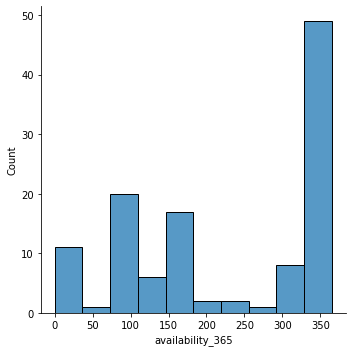

In [ ]:
#Gráfico ilustrando a quantidade casas e sua disponibilidade em dias no ano.
sns.displot(df_boca['availability_365'], kde = False,bins=10);

#####Custo dos alojamentos

In [ ]:
#Alojamento mais caro do bairro La Boca
print("O alojamento mais caro do bairro La Boca se encontra no preço de: R${}".format(df_boca.price.max()))
#Alojamento mais barato do bairro La Boca
print("O alojamento mais barato do bairro La Boca se encontra no preço de: R${}".format(df_boca.price.min()))

O alojamento mais caro do bairro La Boca se encontra no preço de: R$937.71
O alojamento mais barato do bairro La Boca se encontra no preço de: R$18.76


In [ ]:
#A média de preço dos alojamentos
print("A média de preço dos alojamentos em La boca é de: R${:.2f}\n".format(df_boca.price.mean()))
#Comparação com a média de toda Buenos Aires
media_preço_ba=df_clean.price.mean()
if df_boca.price.mean() > media_preço_ba:
  print("A média de preço de toda Buenos Aires é de: R${:.2f}".format(media_preço_ba))
  dif=df_boca.price.mean() - media_preço_ba
  per=(dif/media_preço_ba)* 100
  print("Sendo assim, a média em La Boca é {:.2f}% maior em relação à toda cidade.".format(per))
else:
  print("A média de preço em toda Buenos Aires é de: R${:.2f}".format(media_preço_ba))
  dif=media_preço_ba - df_boca.price.mean()
  per=(dif/media_preço_ba)*100
  print("Sendo assim, a média em La Boca é {:.2f}% menor em relação a toda cidade.".format(per))
  

A média de preço dos alojamentos em La boca é de: R$158.15

A média de preço em toda Buenos Aires é de: R$194.71
Sendo assim, a média em La Boca é 18.78% menor em relação a toda cidade.


In [ ]:
# Criando um df com as médias de preço de La Boca e Buenos Aires
lista = []
lista.append(media_preço_ba)
lista.append(df_boca.price.mean())
dfc=pd.DataFrame(lista,index="BUENOS_AIRES LA_BOCA".split(),columns="MEDIA_PREÇO".split())


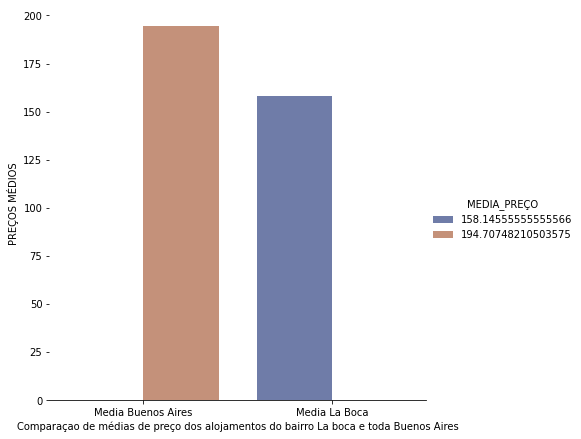

In [ ]:
# Gráfico de comparação entre as médias de preço de La Boca e Buenos Aires
g = sns.catplot(
    data=dfc, kind="bar",
    x=["Media Buenos Aires","Media La Boca"], y="MEDIA_PREÇO",hue="MEDIA_PREÇO",
    ci="sd", palette="dark", alpha=.6, height=6)

g.despine(left=True)
g.set_axis_labels("Comparaçao de médias de preço dos alojamentos do bairro La boca e toda Buenos Aires", "PREÇOS MÉDIOS") ;


#### Retiro
Um dos bairros mais bonitos de toda capital. Retiro ganhou esse nome devido à distância do resto da cidade. Com amplas praças e áreas verdes, Retiro pode ser chamada de "O coração de Buenos Aires"

<center><img alt="Retiro - Buenos Aires" width="50%" src="https://aguiarbuenosaires.com/wp-content/uploads/2018/08/plaza-san-martin5.png"></center>

In [ ]:
#Construindo um dataset apenas com as informações mais relevantes e apenas com entradas do bairro de "Retiro"
df_retiro=df_clean[['room_type','price','minimum_nights','availability_365','neighbourhood']].query("neighbourhood=='Retiro'").reset_index(drop=True)
#Primeira impressão do dataset
df_retiro.head()

,room_type,price,minimum_nights,availability_365,neighbourhood
0,Entire home/apt,125.02,4,327,Retiro
1,Entire home/apt,260.48,30,364,Retiro
2,Entire home/apt,125.02,7,365,Retiro
3,Private room,75.05,4,88,Retiro
4,Entire home/apt,286.49,15,145,Retiro


#####Quantidade de alojamentos e disponibilidade


In [ ]:
#Quantidade total de alojamento
print("O bairro de Retiro possui {} de alojamentos".format(len(df_retiro)))
#Porcentual de alojamento do bairro Retiro em relação a todo dataset
x=len(df_retiro)
y=len(df_clean)
xy=round((x/y)*100,2)
print("O bairo de Retiro possui {}% dos alojamentos de todo dataset".format(xy))

O bairro de Retiro possui 1053 de alojamentos
O bairo de Retiro possui 5.31% dos alojamentos de todo dataset


In [ ]:
#Disponibilidade de 365 dias no bairro de Retiro
print("Dos {} alojamentos em Retiro, {} estão disponíveis o ano inteiro".format(len(df_retiro),sum(df_retiro.availability_365 > 299)))
#Porcentual de disponibilidade anual
x=sum(df_retiro.availability_365 > 299)
y=len(df_retiro)
xy=round((x/y)*100,2)
print("Cerca de {}% dos alojamentos de Retiro estão disponíveis o ano inteiro".format(xy))
print("\n obs:consideramos disponíveis o ano inteiro , alojamentos que ficaram 300 dias ou mais disponíveis no ano")

Dos 1053 alojamentos em Retiro, 458 estão disponíveis o ano inteiro
Cerca de 43.49% dos alojamentos de Retiro estão disponíveis o ano inteiro

 obs:consideramos disponíveis o ano inteiro , alojamentos que ficaram 300 dias ou mais disponíveis no ano


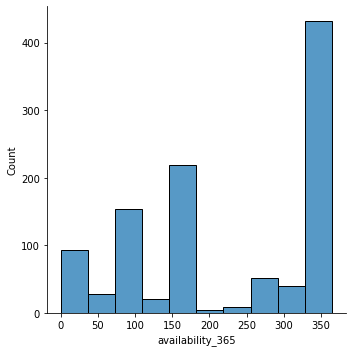

In [ ]:
#Gráfico ilustrando a quantidade casas e sua disponibilidade em dias no ano.
sns.displot(df_retiro['availability_365'], kde = False,bins=10);

#####Custo dos alojamentos

In [ ]:
#Alojamento mais caro do bairro Retiro
print("O alojamento mais caro do bairro Retiro se encontra no preço de: R${}".format(df_retiro.price.max()))
#Alojamento mais barato do bairro Retiro
print("O alojamento mais barato do bairro Retiro se encontra no preço de: R${}".format(df_retiro.price.min()))

O alojamento mais caro do bairro Retiro se encontra no preço de: R$989.81
O alojamento mais barato do bairro Retiro se encontra no preço de: R$41.65


In [ ]:
#A média de preço dos alojamentos
print("A média de preço dos alojamentos em Retiro é de: R${:.2f}\n".format(df_retiro.price.mean()))
#Comparação com a média de Todo Buenos Aires
media_preço_ba=df_clean.price.mean()
if df_retiro.price.mean() > media_preço_ba:
  print("A média de preço de toda Buenos Aires é de: R${:.2f}".format(media_preço_ba))
  dif=df_retiro.price.mean() - media_preço_ba
  per=(dif/media_preço_ba)* 100
  print("Sendo assim, a média em Retiro é {:.2f}% maior em relação a toda cidade.".format(per))
else:
  print("A média de preço de toda Buenos Aires é de: R${:.2f}".format(media_preço_ba))
  dif=media_preço_ba - df_retiro.price.mean()
  per=(dif/media_preço_ba)*100
  print("Sendo assim, a média em Retiro é {:.2f}% menor em relação a toda cidade.".format(per))

A média de preço dos alojamentos em Retiro é de: R$208.91

A média de preço de toda Buenos Aires é de: R$194.71
Sendo assim, a média em Retiro é 7.29% maior em relação a toda cidade.


In [ ]:
# Criando um df com as médias de Retiro e Buenos Aires
lista = []
lista.append(media_preço_ba)
lista.append(df_retiro.price.mean())
dfc=pd.DataFrame(lista,index="BUENOS_AIRES RETIRO".split(),columns="MEDIA_PREÇO".split())

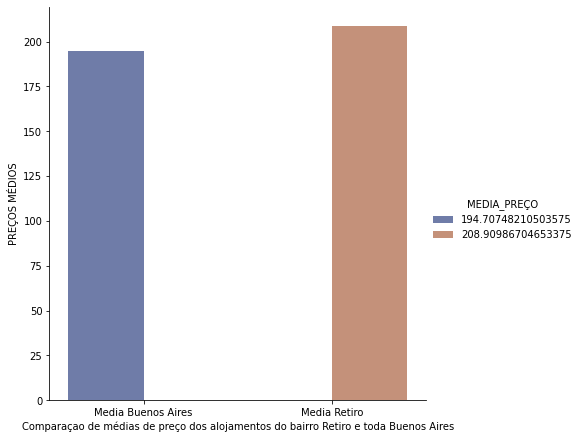

In [ ]:
# Gráfico de comparação entre as médias de Retiro e Buenos Aires
g = sns.catplot(
    data=dfc, kind="bar",
    x=["Media Buenos Aires","Media Retiro"], y="MEDIA_PREÇO",hue="MEDIA_PREÇO",
    ci="sd", palette="dark", alpha=.6, height=6)

g.despine(left=False)
g.set_axis_labels("Comparaçao de médias de preço dos alojamentos do bairro Retiro e toda Buenos Aires", "PREÇOS MÉDIOS");

#### Recoleta
Repleto de parques, museus, cafés e restaurantes, Recoleta é um dos bairros mais procurados de Buenos Aires. Além de varias atrações, o bairro de Recoleta tem a característica de ser próximo de tudo que interessa.

<center><img alt="Recoleta - Buenos Aaires" width="50%" src="https://www.dicasdeviagem.com/wp-content/uploads/2019/07/floralis-generic-1500x1000.jpg"></center>

In [ ]:
#Construindo um dataset apenas com as informações mais relevantes e apenas com entradas do bairro de "Recoleta"
df_recoleta=df_clean[['room_type','price','minimum_nights','availability_365','neighbourhood']].query("neighbourhood=='Recoleta'").reset_index(drop=True)
#Primeira impressão do dataset
df_recoleta.head()

,room_type,price,minimum_nights,availability_365,neighbourhood
0,Private room,140.65,1,365,Recoleta
1,Entire home/apt,112.38,2,364,Recoleta
2,Entire home/apt,450.72,2,365,Recoleta
3,Entire home/apt,104.19,4,350,Recoleta
4,Entire home/apt,416.76,7,365,Recoleta


#####Quantidade de alojamentos e disponibilidade

In [ ]:
#Quantidade total de alojamento
print("O bairro Recoleta possui {} de alojamentos".format(len(df_recoleta)))
#Porcentual de alojamento do bairro Recoleta em relação a todo dataset
x=len(df_recoleta)
y=len(df_clean)
xy=round((x/y)*100,2)
print("O bairo de Recoleta possui {}% dos alojamentos de todo dataset".format(xy))

O bairro Recoleta possui 3366 de alojamentos
O bairo de Recoleta possui 16.97% dos alojamentos de todo dataset


In [ ]:
#Disponibilidade de 365 dias no bairro Recoleta
print("Dos {} alojamento de Recoleta, {} estão disponíveis o ano inteiro".format(len(df_recoleta),sum(df_recoleta.availability_365 > 299)))
#Porcentual de disponibilidade anual
x=sum(df_recoleta.availability_365 > 299)
y=len(df_recoleta)
xy=round((x/y)*100,2)
print("Cerca de {}% dos alojamentos em Recoleta estão disponíveis o ano inteiro".format(xy))
print("\n obs:consideramos disponíveis o ano inteiro , alojamentos que ficaram 300 dias ou mais disponíveis no ano")

Dos 3366 alojamento de Recoleta, 1534 estão disponíveis o ano inteiro
Cerca de 45.57% dos alojamentos em Recoleta estão disponíveis o ano inteiro

 obs:consideramos disponíveis o ano inteiro , alojamentos que ficaram 300 dias ou mais disponíveis no ano


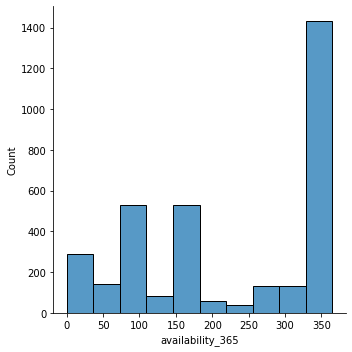

In [ ]:
#Gráfico ilustrando a quantidade casas e sua disponibilidade em dias no ano.
sns.displot(df_recoleta['availability_365'], kde = False,bins=10);

#####Custo dos alojamentos


In [62]:
#Alojamento mais caro do bairro Recoleta
print("O alojamento mais caro do bairro Recoleta se encontra no preço de: R${}".format(df_recoleta.price.max()))
#Alojamento mais barato do bairro Recoleta
print("O alojamento mais barato do bairro Recoleta se encontra no preço de: R${}".format(df_recoleta.price.min()))

O alojamento mais caro do bairro Recoleta se encontra no preço de: R$982.3
O alojamento mais barato do bairro Recoleta se encontra no preço de: R$30.77


In [ ]:
#A média de preço dos alojamentos
print("A média de preço dos alojamentos em Recoleta é de: R${:.2f}\n".format(df_recoleta.price.mean()))
#Comparação com a média de toda Buenos Aires
media_preço_ba=df_clean.price.mean()
if df_recoleta.price.mean() > media_preço_ba:
  print("A média de preço de toda Buenos Aires é de: R${:.2f}".format(media_preço_ba))
  dif=df_recoleta.price.mean() - media_preço_ba
  per=(dif/media_preço_ba)* 100
  print("Sendo assim, a média em Recoleta é {:.2f}% maior em relação à toda cidade.".format(per))
else:
  print("A média de preço em toda Buenos Aires é de: R${:.2f}".format(media_preço_ba))
  dif=media_preço_ba - df_recoleta.price.mean()
  per=(dif/media_preço_ba)*100
  print("Sendo assim, a média em Recoleta é {:.2f}% menor em relação a toda cidade.".format(per))

A média de preço dos alojamentos em Recoleta é de: R$212.21

A média de preço de toda Buenos Aires é de: R$194.71
Sendo assim, a média em Recoleta é 8.99% maior em relação à toda cidade.


In [ ]:
# Criando um df com as médias de preço de Recoleta e Buenos Aires
lista = []
lista.append(media_preço_ba)
lista.append(df_recoleta.price.mean())
dfc=pd.DataFrame(lista,index="BUENOS_AIRES RECOLETA".split(),columns="MEDIA_PREÇO".split())

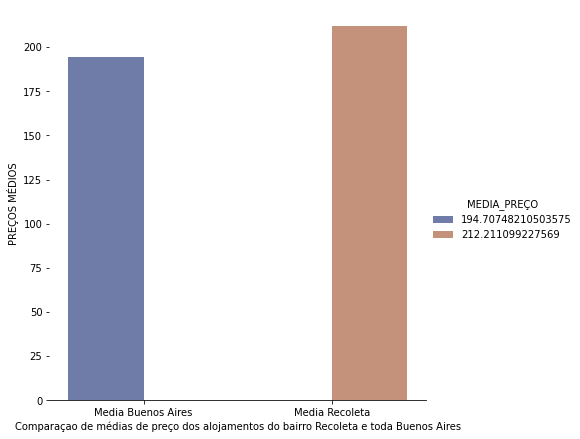

In [ ]:
# Gráfico de comparação entre as médias de preço de Recoleta e Buenos Aires
g = sns.catplot(
    data=dfc, kind="bar",
    x=["Media Buenos Aires","Media Recoleta"], y="MEDIA_PREÇO",hue="MEDIA_PREÇO",
    ci="sd", palette="dark", alpha=.6, height=6)

g.despine(left=True)
g.set_axis_labels("Comparaçao de médias de preço dos alojamentos do bairro Recoleta e toda Buenos Aires", "PREÇOS MÉDIOS") ;

#### Palermo
O maior bairro da capital, reune áreas verdes, cultura, tradição e diversão. Em Palermo os turistas encontram uma mistura de casas residenciaos e uma grande área comercial.

<center><img alt="Palermo - Buenos Aires" width="50%" src="https://aguiarbuenosaires.com/wp-content/uploads/2016/01/2_Palermo-800x535.jpg"></center>

In [ ]:
#Construindo um dataset apenas com as informações mais relevantes e apenas com entradas do bairro de "Palermo"
df_palermo=df_clean[['room_type','price','minimum_nights','availability_365','neighbourhood']].query("neighbourhood=='Palermo'").reset_index(drop=True)
#Primeira impressão do dataset
df_palermo.head()

,room_type,price,minimum_nights,availability_365,neighbourhood
0,Entire home/apt,312.57,2,0,Palermo
1,Private room,156.29,1,365,Palermo
2,Private room,156.29,1,365,Palermo
3,Private room,156.29,1,0,Palermo
4,Private room,208.38,1,365,Palermo


#####Quantidade de alojamentos e disponibilidade

In [ ]:
#Quantidade total de alojamento
print("O bairro de Palermo possui {} de alojamentos".format(len(df_palermo)))
#Porcentual de alojamento do bairro Palermo em relação a todo dataset
x=len(df_palermo)
y=len(df_clean)
xy=round((x/y)*100,2)
print("O bairo de Palermo possui {}% dos alojamentos de todo dataset".format(xy))

O bairro de Palermo possui 6081 de alojamentos
O bairo de Palermo possui 30.65% dos alojamentos de todo dataset


In [ ]:
#Disponibilidade de 365 dias no bairro Palermo
print("Dos {} alojamentos em Palermo, {} estão disponíveis o ano inteiro".format(len(df_palermo),sum(df_palermo.availability_365 > 299)))
#Porcentual de disponibilidade anual
x=sum(df_palermo.availability_365 > 299)
y=len(df_palermo)
xy=round((x/y)*100,2)
print("Cerca de {}% dos alojamentos de Palermo estão disponíveis o ano inteiro".format(xy))
print("\n obs:consideramos disponíveis o ano inteiro , alojamentos que ficaram 300 dias ou mais disponíveis no ano")

Dos 6081 alojamentos em Palermo, 2779 estão disponíveis o ano inteiro
Cerca de 45.7% dos alojamentos de Palermo estão disponíveis o ano inteiro

 obs:consideramos disponíveis o ano inteiro , alojamentos que ficaram 300 dias ou mais disponíveis no ano


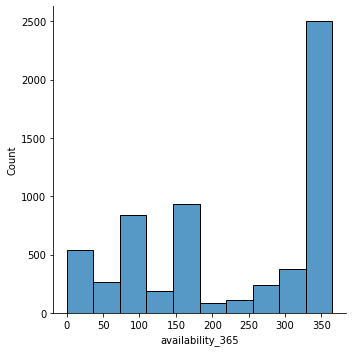

In [ ]:
#Gráfico ilustrando a quantidade casas e sua disponibilidade em dias no ano.
sns.displot(df_palermo['availability_365'], kde = False,bins=10);

#####Custo dos alojamentos

In [ ]:
#Alojamento mais caro do bairro Palermo
print("O alojamento mais caro do bairro Palermo se encontra no preço de: R${}".format(df_palermo.price.max()))
#Alojamento mais barato do bairro Palermo
print("O alojamento mais barato do bairro Palermo se encontra no preço de: R${}".format(df_palermo.price.min()))

O alojamento mais caro do bairro Palermo se encontra no preço de: R$995.0
O alojamento mais barato do bairro Palermo se encontra no preço de: R$30.02


In [ ]:
#A média de preço dos alojamentos
print("A média de preço dos alojamentos em Palermo é de: R${:.2f}\n".format(df_palermo.price.mean()))
#Comparação com a média de Todo Buenos Aires
media_preço_ba=df_clean.price.mean()
if df_palermo.price.mean() > media_preço_ba:
  print("A média de preço de toda Buenos Aires é de: R${:.2f}".format(media_preço_ba))
  dif=df_palermo.price.mean() - media_preço_ba
  per=(dif/media_preço_ba)* 100
  print("Sendo assim, a média em palermo é {:.2f}% maior em relação a toda cidade.".format(per))
else:
  print("A média de preço de toda Buenos Aires é de: R${:.2f}".format(media_preço_ba))
  dif=media_preço_ba - df_palermo.price.mean()
  per=(dif/media_preço_ba)*100
  print("Sendo assim, a média em Palermo é {:.2f}% menor em relação a toda cidade.".format(per))

A média de preço dos alojamentos em Palermo é de: R$225.94

A média de preço de toda Buenos Aires é de: R$194.71
Sendo assim, a média em palermo é 16.04% maior em relação a toda cidade.


In [ ]:
# Criando um df com as médias de Palermo e Buenos Aires
lista = []
lista.append(media_preço_ba)
lista.append(df_palermo.price.mean())
dfc=pd.DataFrame(lista,index="BUENOS_AIRES PALERMO".split(),columns="MEDIA_PREÇO".split())

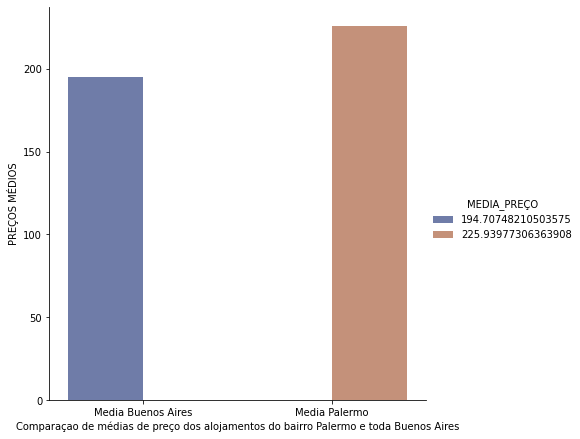

In [ ]:
# Gráfico de comparação entre as médias de Palermo e Buenos Aires
g = sns.catplot(
    data=dfc, kind="bar",
    x=["Media Buenos Aires","Media Palermo"], y="MEDIA_PREÇO",hue="MEDIA_PREÇO",
    ci="sd", palette="dark", alpha=.6, height=6)

g.despine(left=False)
g.set_axis_labels("Comparaçao de médias de preço dos alojamentos do bairro Palermo e toda Buenos Aires", "PREÇOS MÉDIOS");

#### Puerto Madero

Já citado aqui como o bairro mais caro da capital, Puerto Madero recebeu em 1990 um grande projeto de reubarnização e se tornou um lugar muito moderno e luxuoso.

<center><img alt="Puerto Madero - Buenos Aires" width="50%" src="https://aguiarbuenosaires.com/wp-content/uploads/2019/06/puerto_madero_paseo-del-bajo-800x417.jpg"></center>

In [ ]:
#Construindo um dataset apenas com as informações mais relevantes e apenas com entradas do bairro de "Puerto Madero"
df_puertomadero=df_clean[['room_type','price','minimum_nights','availability_365','neighbourhood']].query("neighbourhood=='Puerto Madero'").reset_index(drop=True)
#Primeira impressão do dataset
df_puertomadero.head()

,room_type,price,minimum_nights,availability_365,neighbourhood
0,Entire home/apt,571.36,5,267,Puerto Madero
1,Entire home/apt,138.40,5,143,Puerto Madero
2,Entire home/apt,156.29,3,119,Puerto Madero
3,Entire home/apt,615.76,7,177,Puerto Madero
4,Entire home/apt,364.67,1,114,Puerto Madero


#####Quantidade de alojamentos e disponibilidade

In [ ]:
#Quantidade total de alojamento
print("O bairro Puerto Madero possui {} de alojamentos".format(len(df_puertomadero)))
#Porcentual de alojamento do bairro Puerto Madero em relação a todo dataset
x=len(df_puertomadero)
y=len(df_clean)
xy=round((x/y)*100,2)
print("O bairo de Puerto Madero possui {}% dos alojamentos de todo dataset".format(xy))

O bairro Puerto Madero possui 217 de alojamentos
O bairo de Puerto Madero possui 1.09% dos alojamentos de todo dataset


In [ ]:
#Disponibilidade de 365 dias no bairro Puerto Madero
print("Dos {} alojamento de Puerto Madero, {} estão disponíveis o ano inteiro".format(len(df_puertomadero),sum(df_puertomadero.availability_365 > 299)))
#Porcentual de disponibilidade anual
x=sum(df_puertomadero.availability_365 > 299)
y=len(df_puertomadero)
xy=round((x/y)*100,2)
print("Cerca de {}% dos alojamentos em Puerto Madero estão disponíveis o ano inteiro".format(xy))
print("\n obs:consideramos disponíveis o ano inteiro , alojamentos que ficaram 300 dias ou mais disponíveis no ano")

Dos 217 alojamento de Puerto Madero, 83 estão disponíveis o ano inteiro
Cerca de 38.25% dos alojamentos em Puerto Madero estão disponíveis o ano inteiro

 obs:consideramos disponíveis o ano inteiro , alojamentos que ficaram 300 dias ou mais disponíveis no ano


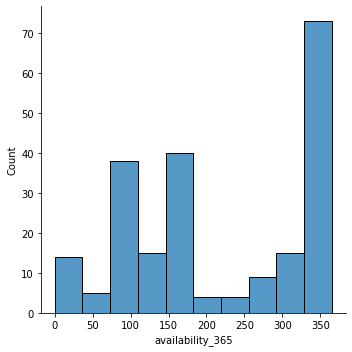

In [ ]:
#Gráfico ilustrando a quantidade casas e sua disponibilidade em dias no ano.
sns.displot(df_puertomadero['availability_365'], kde = False,bins=10);

#####Custo dos alojamentos

In [ ]:
#Alojamento mais caro do bairro Puerto Madero
print("O alojamento mais caro do bairro Puerto Madero se encontra no preço de: R${}".format(df_puertomadero.price.max()))
#Alojamento mais barato do bairro Puerto Madero
print("O alojamento mais barato do bairro Puerto Madero se encontra no preço de: R${}".format(df_puertomadero.price.min()))

O alojamento mais caro do bairro Puerto Madero se encontra no preço de: R$984.55
O alojamento mais barato do bairro Puerto Madero se encontra no preço de: R$52.1


In [ ]:
#A média de preço dos alojamentos
print("A média de preço dos alojamentos em Puerto Madero é de: R${:.2f}\n".format(df_puertomadero.price.mean()))
#Comparação com a média de toda Puerto Madero
media_preço_ba=df_clean.price.mean()
if df_puertomadero.price.mean() > media_preço_ba:
  print("A média de preço de toda Buenos Aires é de: R${:.2f}".format(media_preço_ba))
  dif=df_puertomadero.price.mean() - media_preço_ba
  per=(dif/media_preço_ba)* 100
  print("Sendo assim, a média em Puerto Madero é {:.2f}% maior em relação à toda cidade.".format(per))
else:
  print("A média de preço em toda Buenos Aires é de: R${:.2f}".format(media_preço_ba))
  dif=media_preço_ba - df_puertomadero.price.mean()
  per=(dif/media_preço_ba)*100
  print("Sendo assim, a média em Puerto Madero é {:.2f}% menor em relação a toda cidade.".format(per))

A média de preço dos alojamentos em Puerto Madero é de: R$436.43

A média de preço de toda Buenos Aires é de: R$194.71
Sendo assim, a média em Puerto Madero é 124.15% maior em relação à toda cidade.


In [ ]:
# Criando um df com as médias de preço de Puerto Madero e Buenos Aires
lista = []
lista.append(media_preço_ba)
lista.append(df_puertomadero.price.mean())
dfc=pd.DataFrame(lista,index="BUENOS_AIRES PUERTO_MADERO".split(),columns="MEDIA_PREÇO".split())

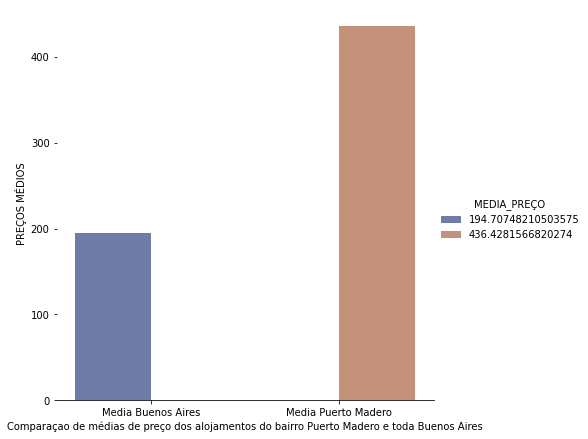

In [ ]:
# Gráfico de comparação entre as médias de preço de Puerto Madero e Buenos Aires
g = sns.catplot(
    data=dfc, kind="bar",
    x=["Media Buenos Aires","Media Puerto Madero"], y="MEDIA_PREÇO",hue="MEDIA_PREÇO",
    ci="sd", palette="dark", alpha=.6, height=6)

g.despine(left=True)
g.set_axis_labels("Comparaçao de médias de preço dos alojamentos do bairro Puerto Madero e toda Buenos Aires", "PREÇOS MÉDIOS") ;

#Conclusão

Após das análises feitas no *dataset*, é possivel concluir que o AirBnB está bem presente em Buenos Aires. Com seus 20636 alojamentos espalhados por Buenos Aires, o portal se mostra uma grande opção para turistas que querem conhecer a capital argentina.

A variadade de preços (dependendo do bairro) também chama atenção após a análise. Com menos de 100 reais é possivel passar uma noite em Buenos Aires atraves do AirBnB, e por outro lado, com opções mais luxuosas existem bairros onde o valor ultrapassa a faixa de 400 reais.

A quantidade de imóveis disponíveis por todo ano beira o 50%, o que leva a crer, que a outra metade trabalha apenas com temporadas festivas ou épocas mais procuradas.

Por fim, apesar da necessidade de remoção de *outliers*, o conjunto de dados se mostrou muito bem estruturado e agradável de trabalhar. Toda ánalise foi feita com cunho de aprendizado sem ligação com nenhuma empresa do ramo ou nao.

